# Task: Our task is predict the categorization of a persons credit score based on a selection of attributes

In [75]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 predict the categorization of a persons credit score based on a selection of attr# Task: Our task isibutes

In [39]:
test_url = "https://raw.githubusercontent.com/Harshk10-star/Credit-Score-Classification/466ff436e9a5623cb0b4c778c3fbf5da84d0ae76/train.csv"
test_info = pd.read_csv(test_url, sep=',')
train_url = ""

C:\Users\DvirM\AppData\Local\Temp\ipykernel_29668\2037590750.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  test_info = pd.read_csv(test_url, sep=',')


# 1 - Exploratory Data Analysis (EDA)

In [40]:
test_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [41]:
test_info.shape

(100000, 28)

In [42]:
test_info.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [43]:
test_info.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [44]:
test_info.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

- Roughly 15% of entries do not contain a value for `Monthly_Inhand_Salary` 
- There are some columns who's data types are objects when they should be numerical like `Outstanding_Debt` for example

In [45]:
test_info.drop_duplicates(inplace=True) # removes duplicate rows

In [46]:
test_info

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [47]:
test_info["Type_of_Loan"].fillna("Not Specified", inplace=True) #fills in rows with null values in the type of loan col with "not specified"

C:\Users\DvirM\AppData\Local\Temp\ipykernel_29668\4178668343.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_info["Type_of_Loan"].fillna("Not Specified", inplace=True) #fills in rows with null values in the type of loan col with "not specified"


In [48]:
#test_info.isna().sum()

In [49]:
test_info.drop(columns=['Name'], inplace=True) #The person's name is not a factor  that affects the outcome of the model so we drop it

In [50]:
#test_info.isna().sum()

In [51]:
#print(test_info.dtypes)

In [52]:
#we format the annual income fields to not include underscores and convert them from objects to float values
test_info['Annual_Income'] = test_info['Annual_Income'].str.replace('_', '') 
test_info['Annual_Income'] = pd.to_numeric(test_info['Annual_Income'], errors='coerce')


In [53]:
#goes through unfilled values in monthly inhand salary and fills it with fields of monthly inhand salary from other people who have a similar income to them
missing_indices = test_info[test_info['Monthly_Inhand_Salary'].isnull()].index
for index in missing_indices:
    annual_income = test_info.loc[index, 'Annual_Income']
    similar_salaries = test_info[(test_info['Annual_Income'] >= annual_income - 10000) & 
                          (test_info['Annual_Income'] <= annual_income + 10000) & 
                          test_info['Monthly_Inhand_Salary'].notnull()]
    if not similar_salaries.empty:
        estimated_salary = similar_salaries['Monthly_Inhand_Salary'].median()
        test_info.loc[index, 'Monthly_Inhand_Salary'] = estimated_salary

In [54]:
#test_info.isna().sum()

In [55]:
#Filling all the nan columns with 0
test_info['Num_of_Delayed_Payment'].fillna(0, inplace=True)

C:\Users\DvirM\AppData\Local\Temp\ipykernel_29668\1250647270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_info['Num_of_Delayed_Payment'].fillna(0, inplace=True)


In [56]:
#test_info.isna().sum()
#print(test_info.dtypes)

In [57]:
test_info['Num_of_Loan'] = test_info['Num_of_Loan'].astype(str) # converts vals in column to string
test_info['Num_of_Loan'] = test_info['Num_of_Loan'].str.replace('_', '') # removes underscores from string
test_info['Num_of_Loan'] = pd.to_numeric(test_info['Num_of_Loan'], errors='coerce') # converts string to int value
test_info.loc[test_info['Num_of_Loan'] < 0, 'Num_of_Loan'] = 0 #changes any negative values to 0

(test_info['Num_of_Loan'] < 0).sum()
row_6375 = test_info.iloc[6373]  # Rows are zero-indexed, so row 6375 is at index 6374
#print(row_6375)
#test_info

In [58]:
# Calculate the sum of 'Num_of_Credit_Card' and 'Num_of_Loan' for each row
sum_values = test_info['Num_Credit_Card'] + test_info['Num_of_Loan']
# Fill null values in 'Num_Credit_Inquiries' with the calculated sum
test_info['Num_Credit_Inquiries'].fillna(sum_values, inplace=True)
#test_info.isna().sum()

C:\Users\DvirM\AppData\Local\Temp\ipykernel_29668\2843778342.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_info['Num_Credit_Inquiries'].fillna(sum_values, inplace=True)


In [59]:
test_info['Credit_History_Age'] = test_info['Credit_History_Age'].str.extract(r'(\d+) Years')
test_info['Credit_History_Age'] = pd.to_numeric(test_info['Credit_History_Age'], errors='coerce')
#test_info.isna().sum()

test_info.isnan().

In [60]:
test_info['Credit_History_Age'].fillna(0, inplace=True) #filled nan values with 0 (we assume that person either has no credit age or is less than 1 year)
test_info.isna().sum()

C:\Users\DvirM\AppData\Local\Temp\ipykernel_29668\2977417794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_info['Credit_History_Age'].fillna(0, inplace=True) #filled nan values with 0 (we assume that person either has no credit age or is less than 1 year)


ID                             0
Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary         70
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

In [61]:
# Assuming test_info is your DataFrame

# Convert 'Amount_invested_monthly' column to numeric, coercing errors to NaN
test_info['Amount_invested_monthly'] = pd.to_numeric(test_info['Amount_invested_monthly'], errors='coerce')

# Filter out NaN values in 'Amount_invested_monthly'
not_null_investments = test_info.dropna(subset=['Amount_invested_monthly'])

# Iterate through missing indices and fill with median of similar salaries
missing_indices = test_info[test_info['Amount_invested_monthly'].isnull()].index
for index in missing_indices:
    annual_income = test_info.loc[index, 'Annual_Income']
    similar_salaries = not_null_investments[(not_null_investments['Annual_Income'] >= annual_income - 10000) & 
                                             (not_null_investments['Annual_Income'] <= annual_income + 10000)]
    if not similar_salaries.empty:
        estimated_salary = similar_salaries['Amount_invested_monthly'].median()
        test_info.loc[index, 'Amount_invested_monthly'] = estimated_salary

#test_info.isna().sum()

In [62]:
test_info['Amount_invested_monthly'].fillna(0, inplace=True) #filled nan values with 0 
#test_info.isna().sum()

C:\Users\DvirM\AppData\Local\Temp\ipykernel_29668\2355077215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_info['Amount_invested_monthly'].fillna(0, inplace=True) #filled nan values with 0


In [63]:
# Drop rows where 'Monthly_Inhand_Salary' is NaN
test_info.dropna(subset=['Monthly_Inhand_Salary'], inplace=True)

# Verify that rows have been deleted
print("Rows with NaN in 'Monthly_Inhand_Salary' column removed.")

# Print the updated DataFrame shape to see the number of rows after deletion
print("Updated DataFrame shape:", test_info.shape)
test_info.isna().sum()

Rows with NaN in 'Monthly_Inhand_Salary' column removed.
Updated DataFrame shape: (99930, 27)


ID                             0
Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

In [64]:
# Assuming test_info is your DataFrame

# Convert 'Amount_invested_monthly' column to numeric, coercing errors to NaN
test_info['Monthly_Balance'] = pd.to_numeric(test_info['Monthly_Balance'], errors='coerce')

# Filter out NaN values in 'Amount_invested_monthly'
not_null_investments = test_info.dropna(subset=['Monthly_Balance'])

# Iterate through missing indices and fill with median of similar salaries
missing_indices = test_info[test_info['Monthly_Balance'].isnull()].index
for index in missing_indices:
    annual_income = test_info.loc[index, 'Annual_Income']
    similar_salaries = not_null_investments[(not_null_investments['Annual_Income'] >= annual_income - 10000) & 
                                             (not_null_investments['Annual_Income'] <= annual_income + 10000)]
    if not similar_salaries.empty:
        estimated_salary = similar_salaries['Monthly_Balance'].median()
        test_info.loc[index, 'Monthly_Balance'] = estimated_salary

test_info.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             3
Credit_Score                0
dtype: int64

In [65]:
# Drop rows where 'Monthly_Inhand_Salary' is NaN
test_info.dropna(subset=['Monthly_Balance'], inplace=True)

# Verify that rows have been deleted
print("Rows with NaN in 'Monthly_Balance' column removed.")

# Print the updated DataFrame shape to see the number of rows after deletion
print("Updated DataFrame shape:", test_info.shape)

Rows with NaN in 'Monthly_Balance' column removed.
Updated DataFrame shape: (99927, 27)


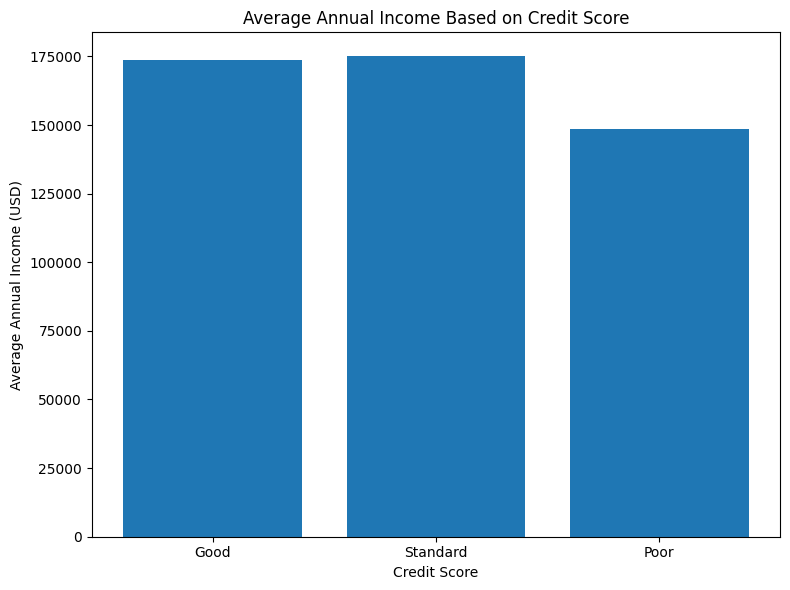

In [69]:
# Sample data (replace this with your actual data)
# Assuming you have a DataFrame named test_info with columns 'Credit_Score' and 'Annual_Income'
# Here, I'm using sample data for demonstration purposes
credit_scores = test_info['Credit_Score'].unique()  # Extract unique credit score categories

# Calculate average annual income for each credit score category
income_values = [test_info[test_info['Credit_Score'] == score]['Annual_Income'].mean() for score in credit_scores]

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the bar graph
plt.bar(credit_scores, income_values)

# Add labels and title
plt.xlabel('Credit Score')
plt.ylabel('Average Annual Income (USD)')
plt.title('Average Annual Income Based on Credit Score')

# Show the plot
plt.tight_layout()
plt.show()
#This shows Income is not correlated to credit score 

In [97]:
print(test_info.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Age                          object
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object


In [99]:
test_info['Num_of_Delayed_Payment'] = test_info['Num_of_Delayed_Payment'].str.replace('_', '') 
test_info['Num_of_Delayed_Payment'] = test_info['Num_of_Delayed_Payment'].replace(r'.*-', '0', regex=True)
test_info['Num_of_Delayed_Payment'] = pd.to_numeric(test_info['Num_of_Delayed_Payment'], errors='coerce')

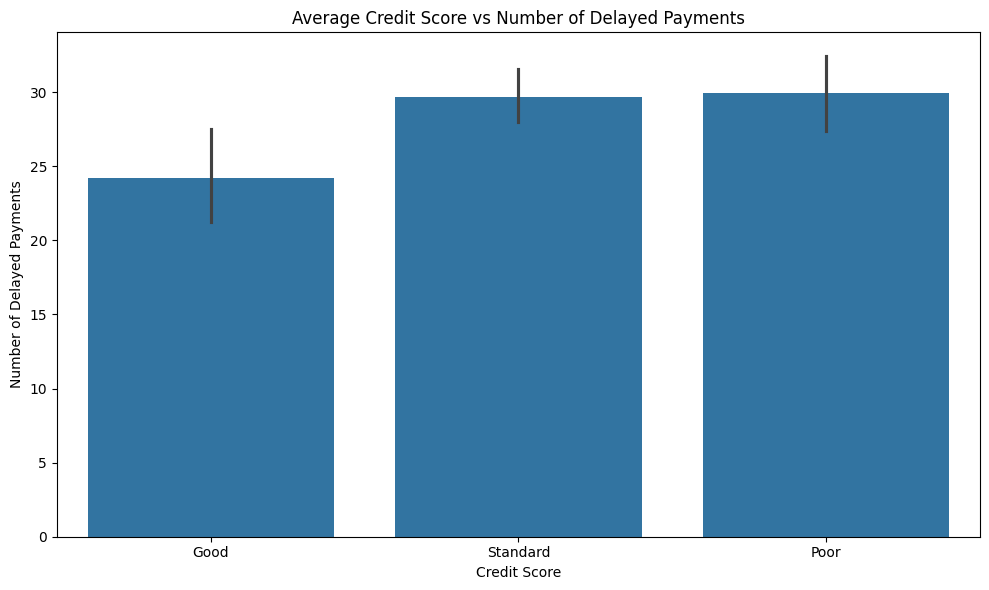

In [101]:

# Assuming 'Num_of_Delayed_Payment' is already converted to numeric
# Plotting using seaborn for a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=test_info)

# Add labels and title
plt.xlabel('Credit Score')
plt.ylabel('Number of Delayed Payments')
plt.title('Average Credit Score vs Number of Delayed Payments')

# Show the plot
plt.tight_layout()
plt.show()

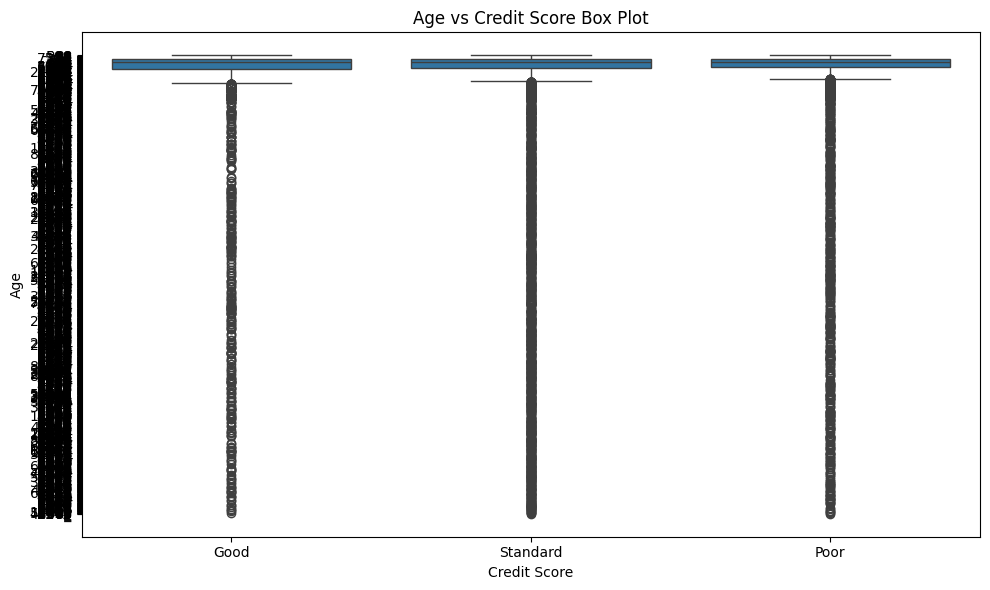

In [102]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='Credit_Score', y='Age', data=test_info)

# Add labels and title
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.title('Age vs Credit Score Box Plot')

# Show the plot
plt.tight_layout()
plt.show()